In [1]:
import tensorflow as tf

In [2]:
import numpy as np

## Supervised Machine Learning
#### The two groups of supervised learning are:
- Classification: A classification problem is when the output variable is a category
- Regression: A regression problem is when the output variable is a real value

#### Some popular examples of supervised machine learning algorithms are:
- Linear regression for regression problems
- Random Forest for classification and regresion problems
- Support vector machines (SVM) for classification problems

## Unsupervised Machine Learning
- Unsupervised learning is where you only have input data and no corresponding output variables
- The goal for unsupervised learning is to model the underlying stgructure or distribution in the data in order to learn more about the data
- These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is not teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data

#### Unsupervised Learning problems can be further grouped into clustering and association problems:
- Clustering: A clustering problem is where you want to discover the inherent groupings in the data, such grouping customers by puchasing behavior

## Semi-Supervised Machine Learning
- Problems where we have a large amount of input data and only some of it is labeled (Y) are called semi-supervised learning problems
- These problems sit in between both supervised and unsupervised learning
- Hence unlabeled data is cheap and eash to collect and store
- You can use supervised learning techniques to discover and learn the structure in the input variables
- you can also use supervised learning techniques to make best guess predictions for the unlabeled data, feed that data back into the supervised algorithm as training data and use the model to make predictions on new unseen data (back propogation)

## Association Learning
#### Can be applied if no class is specified and any kind of structure is considered "interesting"
#### Difference to Classification Learning:
- Can predict any attribute's value


## Clustering
#### Finding groups of items that are similar
#### Clustering is unsupervised
- The class of an example is not known

- Sucess often measured subjectively
- Clustering techniques apply when there is no calss to be predicted: they perform unsupervised learning
- Aim: divide instanves into "natural" groups

#### Clusters can be:
- disjoint vs. overlapping
- deterministic vs. probablistic
- flat vs. hierarchial

## Numeric prediction
- Variant of classification learning where "class" is numeric (also called regression)
- Each instance is described by a fixed predefined set of features, its attributes
- But, number of attributes may vary in practice
    - Possible solution: "irrelevant value" flag
- Related Problem: existence of an attribute may depend on value of another one

## The k-means algorithm
- Step 1: Choose k random cluster centers
- Step 2: Assign each instance to its closest cluster center based on Euclidean distance
- Step 3: Re-compute cluster centers by computing the average (aka centroid) of the instances pertaining to each cluster
- Step 4: If cluster centers have moved, go back to step 2

#### This algorithm minimizes the squared Euclidean distance of the instances from their corresponding cluster centers
- determines a solution that achieves a local minimum of the squared Euclidean distance

#### Equivalent termination criterion: stop when assignment of instances to cluster centers...

## K-Means with Tensorflow
#### Example

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Create aliases:
tf.sub = tf.subtract

In [5]:
points_n = 200
clusters_n = 3
iterations_n = 100

#### 1. Let's generate random data points with a uniform distribution and assign them to a 2D tensor constant. Then, randomly choose initial centroids from the set of data points


In [6]:
points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

#### 2. Next we want to be able to do element-wise subtraction of points and centroids that are 2D tensors. Because the tensors have different shape, let's expand points and centroids into 3 dimensions, which allows us to use the broadcasting feature of subtraction operation:

In [7]:
points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

In [8]:
sess = tf.Session()
sess.run(points).shape

(200, 2)

In [9]:
sess.run(points_expanded).shape

(1, 200, 2)

#### 3. Then, calculate the distances between points and centroids and determine the cluster assignments:

In [10]:
distances = tf.reduce_sum(tf.square(tf.sub(points_expanded, centroids_expanded)),2)
assignments = tf.argmin(distances, 0)

In [11]:
means = []
for c in range(clusters_n):
    means.append(tf.reduce_mean(tf.gather(points, tf.reshape(tf.where(tf.equal(assignments, c)), [1, -1])), reduction_indices=[1]))

#### 4. Next, we can compare each cluster with a cluster assignments vector, get points assigned to each cluster, and calculate mean values. These mean values are refined centroids, so let's update the centroids variable with the new values

In [12]:
new_centroids = tf.concat(means, 0)

update_centroids = tf.assign(centroids, new_centroids)
init = tf.global_variables_initializer()

#### 5.

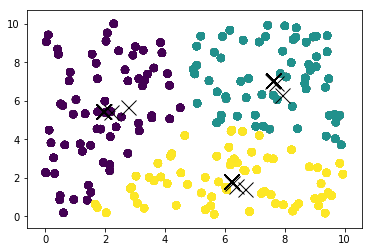

In [13]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(iterations_n):
        [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, points, assignments])
        plt.scatter(points_values[:,0], points_values[:,1], c=assignment_values, s=50, alpha=0.5)
        plt.plot(centroid_values[:,0], centroid_values[:,1], 'kx', markersize=15)
        

#### The models may vary significantly in:
- the number of operations they use (multiply, add, etc.)
- the way they combine
- the number of parameters they have

#### Regardless, we always apply the same general structure for training them:
- 1. Initialize model parameters
- 2. Input training data
- 3. Execute inference model on training data
- 4. Compute loss
- 5. to 2. Adjust model parameters

#### The loop repeats this process through a number of cycles, according to:
- the learning rate that we need to apply, and
- depending on the model and data we input to it

#### After training, we apply an evaluation phase

In [14]:
# def inference(X):

# def loss(X, Y):

# def inputs():

# def train(total_loss):

# def evaluate(sess, X, Y):

In [15]:
# with tf.Session() as sess:
#     tf.initialize_all_variables.run()
    
#     X, Y = inputs()
    
#     total_loss = loss(X, Y)
#     train_op = train(total_loss)
    
#     ...

- As we already stated, training models implies updating their parameters, or variables in TF, through many training cycles
- We use tf.train.Saver

In [16]:
# saver = tf.train.Saver()

# with tf.Session() as sess:
#     for step in range(training_steps):
#         sess.run([train_op])
        
#         if step % 1000 == 0:
#             saver.save(sess, 'my-model', global_step=step)
    
#     # evaluation
    
#     saver.save(sess, 'my-model', global_training_step=step)
#     sess.close()

- if we wish to recover the training from a certain point, we should use the tf.train_checkpoint_state() method
- It will verify if we already have a checkpoint saved, and the tf.train.Saver.restore() method to recover the variable values

- We will use the gradient descent algorithm

In [17]:
# def train(total_loss):
#     learning_rate = 0.0000001
#     return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

- when you run it, you will see printed how the loss gets smaller on each training step

In [18]:
# def evaluate(sess, X, Y):
#     print sess.run(inference([[80., 25.]])) # ~ 303
#     print sess.run(inference([[65., 25.]])) # ~ 256